In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("data_set.csv")
data

,Registration No,Generic name,Trade name,Strength value,Unit of strength,Dosage Form,Route of Administration,Volume,Unit of volume,Package type,...,Type,Withdrawal Period (days),Manufacturer name,Country of Manufacturer,Marketing Company,Nationality,MAH (Agent name),Authorization status,Marketed,Marketing status
0,6820016000301,Colistin,COLISTIN SAV 2MIU ® (WSP),2000000,IU/g,Powder for use in drinking water,Oral,500.0,g,Bottle,...,Meat,7,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),Valid,Marketed,Marketed
1,6820016000701,Ivermectin,Ivermectin 1%®,1,%,Solution for injection,Subcutaneous,100.0,ml,Vial,...,Meat,35,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),Valid,Marketed,Marketed
2,6820016000201,Ascorbic acid,Vitamin C 25 % ® WSP,250,mg/g,Powder for use in drinking water,Oral,1000.0,g,Bottle,...,NaN,NaN,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),Valid,Marketed,Marketed
3,6820016001201,Tylosin Tartarate,Tylosav ®Injection,200,mg/ml,Solution for injection,Intramuscular,50.0,ml,Vial,...,"meat, milk","28, 7",Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),SAUDI ARABIA,Saudi Pharmaceutical Industries (SPI),Valid,Marketed,Marketed
4,4000016000302,Colistin,Colistin 80,800000,IU/g,Powder for use in drinking water,Oral,100.0,g,Sachet,...,"meat, egg","7, 7",The Arab Pesticides and Veterinary Drugs Manuf...,JORDAN,The Arab Pesticides and Veterinary Drugs Manuf...,JORDAN,Falcon’s Care Center,Valid,Marketed,Marketed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2500036017502,Live Pneumovirus PL21 Strain,Nemovac,log10 CCID50,dose,Lyophilisate for suspension,Oral,5000.0,doses,Vial,...,NaN,0,Merial S.A.S,France,Merial S.A.S,France,Abdulrehman Algosaibi G.T.C.,Valid,NaN,Marketed
594,8400076014301,"Mycoplasma Gallisepticum, strain TS-11",MG TS-11,NLT 10ˆ7.9,Cu,Suspension for injection,Ocular,30.0,ml,Vial,...,Meat & Egg,21,Merial Inc,United States,Merial Inc,UNITED STATES,Abdulrehman Algosaibi G.T.C.,Valid,NaN,Marketed
595,2500036017601,"Newcastle Disease virus Ulster 2C Strain, Infe...",Gallimune 407 ND+IB+EDS+ART,"NLT 50 , NLT 18 , NLT 18 , NLT 60",IU,Emulsion for injection,Intramuscular,300.0,doses,Bottle,...,NaN,0,Merial S.A.S,France,Merial S.A.S,France,Abdulrehman Algosaibi G.T.C.,Valid,NaN,Marketed
596,2500036017602,"Newcastle Disease virus Ulster 2C Strain, Infe...",Gallimune 407 ND+IB+EDS+ART,"NLT 50 , NLT 18 , NLT 18 , NLT 60",IU,Emulsion for injection,Intramuscular,300.0,doses,Box,...,NaN,0,Merial S.A.S,France,Merial S.A.S,France,Abdulrehman Algosaibi G.T.C.,Valid,NaN,Marketed


In [ ]:
#show all columns and who many missings values it's has

data.isnull().sum()

Registration No               0
Generic name                  0
Trade name                    0
Strength value               65
Unit of strength            100
Dosage Form                   4
Route of Administration      58
Volume                        2
Unit of volume                5
Package type                  0
Shelf-life (mon)              1
Package size                128
Legal status                  0
Product control               0
Storage conditions           11
ATCvet                      119
Target Animals               19
Type                        163
Withdrawal Period (days)    138
Manufacturer name             0
Country of Manufacturer       0
Marketing Company             0
Nationality                   0
MAH (Agent name)              0
Authorization status          0
Marketed                    209
Marketing status              1
dtype: int64

In [ ]:
#handling all missing values with drop null rows
df_cleaned = data.dropna()

Q1

<ipython-input-5-003fc6f8f746>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_dosage_forms.index, x=top_dosage_forms.values, orient='h', palette="hls")


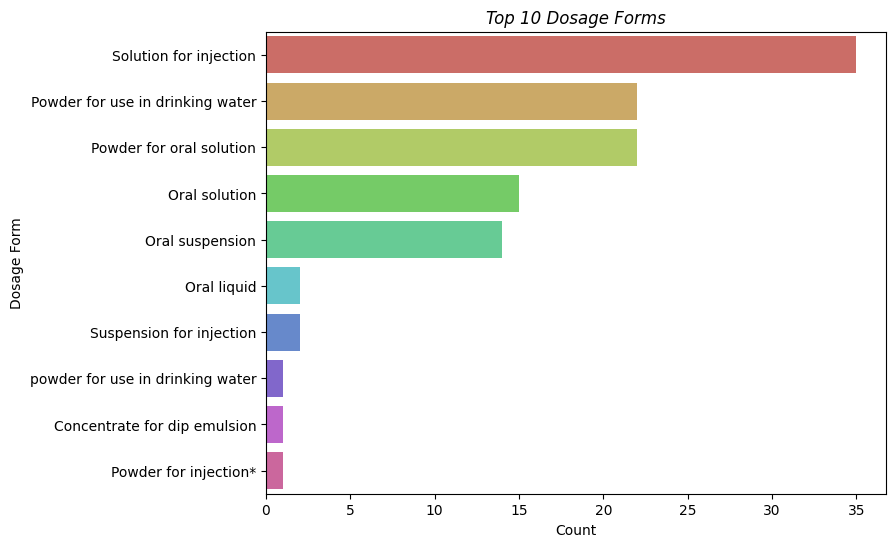

In [ ]:
# Top 10 Dosage Forms - Horizontal Bar Chart
top_dosage_forms = df_cleaned['Dosage Form'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_dosage_forms.index, x=top_dosage_forms.values, orient='h', palette="hls")
plt.title('Top 10 Dosage Forms', fontstyle='italic')
plt.xlabel('Count')
plt.ylabel('Dosage Form')
plt.show()

In [ ]:
# Dropping irrelevant columns
columns_to_drop = ['Registration No', 'Strength value', 'Unit of strength ', 'Volume',
                   'Unit of volume', 'Package type', 'MAH (Agent name)', 'Authorization status',
                   'Marketed', 'Marketing status']
data_cleaned = data.drop(columns=columns_to_drop)

# Handling missing values for 'Withdrawal Period (days)'
data_cleaned['Withdrawal Period (days)'].fillna('Unknown', inplace=True)

# Focus on relevant columns and drop rows with missing 'Target Animals'
relevant_columns = ['Generic name', 'Dosage Form', 'Route of Administration', 'Target Animals']
data_subset = data_cleaned[relevant_columns].dropna(subset=['Target Animals'])

# Separate the animal types into individual entries
data_subset['Target Animals'] = data_subset['Target Animals'].str.split(',').explode('Target Animals').str.strip()

# Group data by 'Target Animals' and aggregate
grouped_data = data_subset.groupby('Target Animals').agg({
    'Generic name': 'nunique',
    'Dosage Form': pd.Series.mode,  # Most common dosage form
    'Route of Administration': pd.Series.mode  # Most common route of administration
}).reset_index()

# Display the first 10 rows of the grouped data
grouped_data.head(10)

,Target Animals,Generic name,Dosage Form,Route of Administration
0,All species,1,Suspension for injection,Subcutaneous
1,Birds,1,Concentrate for dip emulsion,Topical
2,Bovine,1,Powder for oral solution,Oral
3,Buffaloes,2,Powder for oral solution,Oral
4,Calf,10,solution for injection,Intravenous (not otherwise specified)
5,Calve,4,Powder for oral solution,Oral
6,Calves,18,Solution for injection,Oral
7,Camel,15,Solution for injection,Intravenous (not otherwise specified)
8,Camel & small animals,1,Lyophilisate for suspension,Oral
9,Camels,1,Solution for injection,Intramuscular


<ipython-input-7-ae8846511781>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target Animals', y='Generic name', data=top_10_animal_types, ci=None, palette='muted', edgecolor='black')
<ipython-input-7-ae8846511781>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Target Animals', y='Generic name', data=top_10_animal_types, ci=None, palette='muted', edgecolor='black')


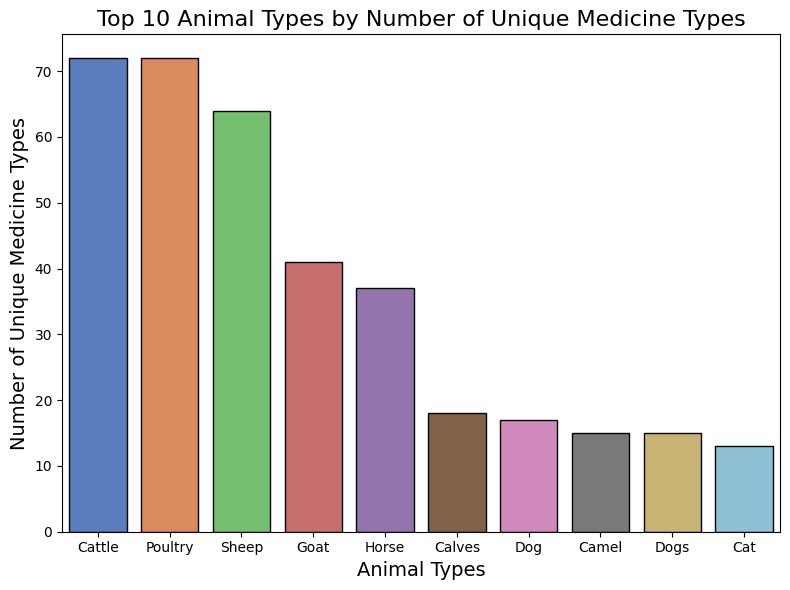

In [ ]:
# First, let's find the top 10 animal types by the number of unique medicine types using the head function
top_10_animal_types = grouped_data.nlargest(10, 'Generic name').head(10)

# Now, we'll create the bar plot for just these top 10 animal types
plt.figure(figsize=(8, 6))
sns.barplot(x='Target Animals', y='Generic name', data=top_10_animal_types, ci=None, palette='muted', edgecolor='black')

# Add title and labels to the plot
plt.title('Top 10 Animal Types by Number of Unique Medicine Types', fontsize=16)
plt.xlabel('Animal Types', fontsize=14)
plt.ylabel('Number of Unique Medicine Types', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-8-e91be07445d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Dosage Form', data=data_subset, order=top_10_dosage_forms, palette='hls')


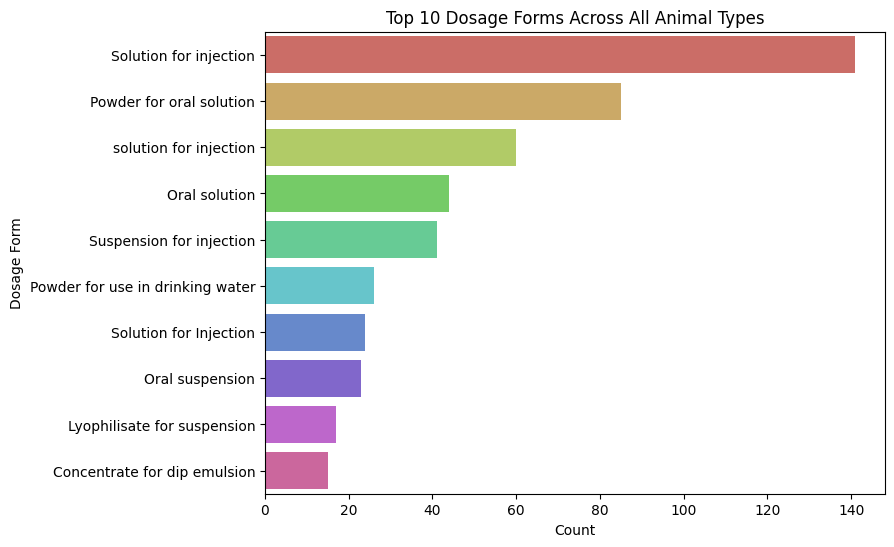

In [ ]:
# For Dosage Forms
# Top 10 Dosage Forms
top_10_dosage_forms = data_subset['Dosage Form'].value_counts().head(10).index
# Plotting the top 10 Dosage Forms
plt.figure(figsize=(8, 6))
sns.countplot(y='Dosage Form', data=data_subset, order=top_10_dosage_forms, palette='hls')
plt.title('Top 10 Dosage Forms Across All Animal Types')
plt.xlabel('Count')
plt.ylabel('Dosage Form')
plt.show()

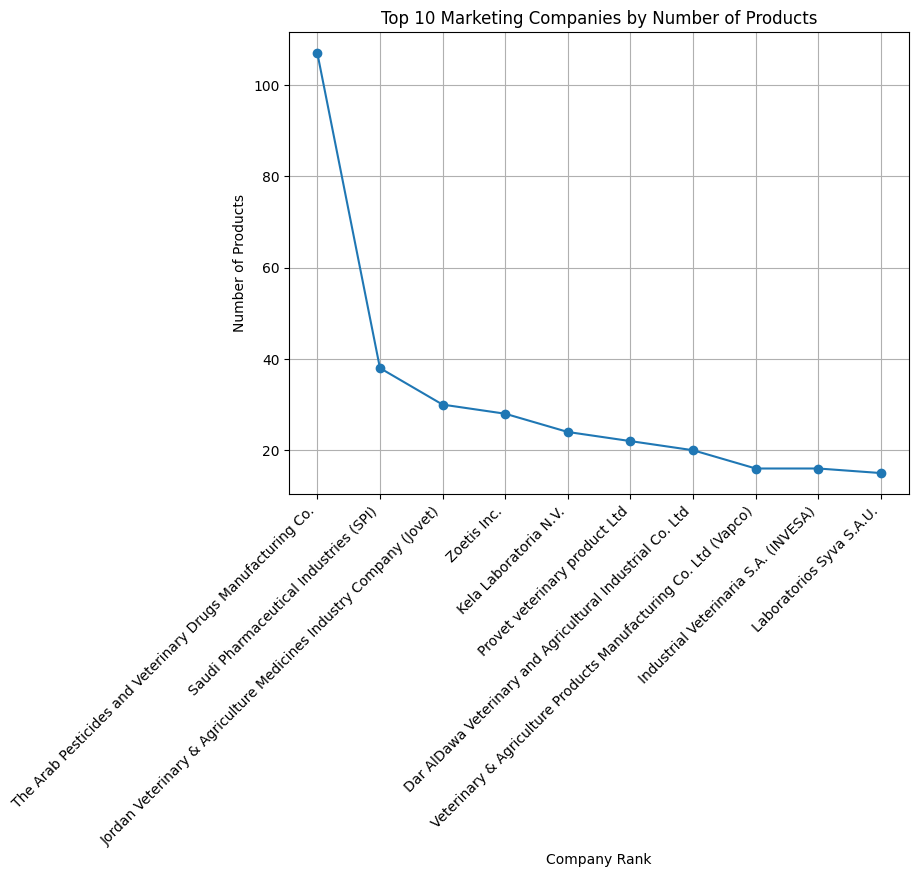

In [ ]:
# Assuming marketing_company_counts is defined elsewhere and is a Pandas Series
# Let's first ensure we're working with the top 10 companies only
sorted_marketing_companies = marketing_company_counts.sort_values(ascending=False)[:10]

# Generating a list of indexes (1 to 10) for the x-axis
x_values = range(1, len(sorted_marketing_companies) + 1)

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(x_values, sorted_marketing_companies, marker='o')
plt.title('Top 10 Marketing Companies by Number of Products')
plt.xlabel('Company Rank')
plt.ylabel('Number of Products')
plt.xticks(x_values, sorted_marketing_companies.index, rotation=45, ha="right")
plt.grid(True)
plt.show()


Q2

In [ ]:
# Focus on relevant columns for manufacturer and marketing company analysis
manufacturer_columns = ['Manufacturer name', 'Marketing Company', 'Country of Manufacturer']
data_manufacturers = data[manufacturer_columns]

# Dropping rows with missing values in these columns
data_manufacturers.dropna(subset=manufacturer_columns, inplace=True)

# Now let's analyze the distribution of manufacturers and marketing companies globally.

# Counting the number of products per manufacturer
manufacturer_counts = data_manufacturers['Manufacturer name'].value_counts().head(10)

# Counting the number of products per marketing company
marketing_company_counts = data_manufacturers['Marketing Company'].value_counts().head(10)

# Counting the number of products per country of manufacturer
country_counts = data_manufacturers['Country of Manufacturer'].value_counts().head(10)

<ipython-input-16-d6ec9dc452c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_manufacturers.dropna(subset=manufacturer_columns, inplace=True)


<ipython-input-17-5d5ae94a4e6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=manufacturer_counts.index, x=manufacturer_counts.values, palette="viridis")


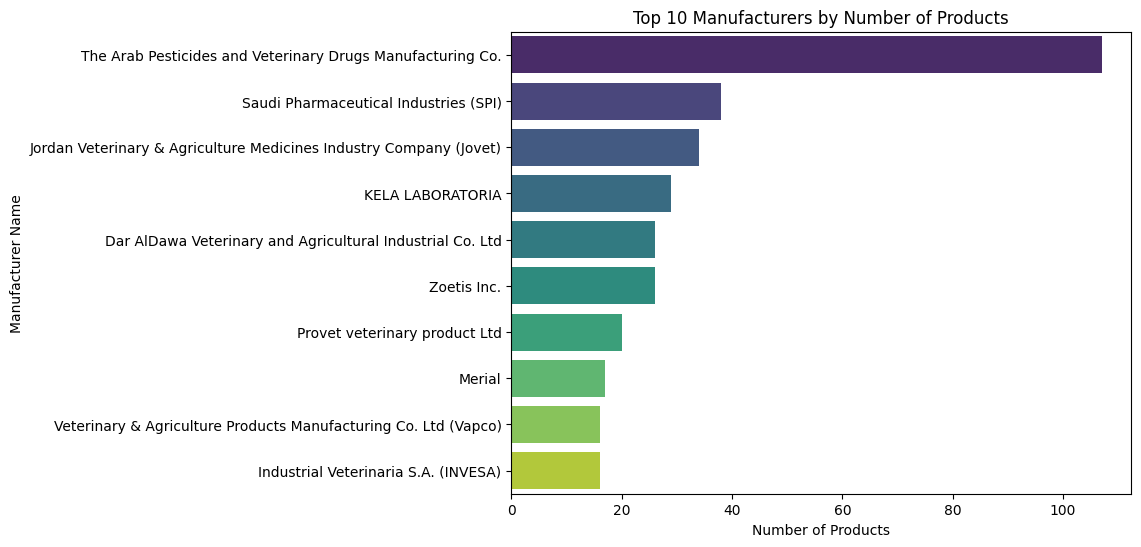

In [ ]:
# Visualization: Top 10 Manufacturers
plt.figure(figsize=(8, 6))
sns.barplot(y=manufacturer_counts.index, x=manufacturer_counts.values, palette="viridis")
plt.title('Top 10 Manufacturers by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Manufacturer Name')
plt.show()

<ipython-input-18-51a1ac008c5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=marketing_company_counts.index, x=marketing_company_counts.values, palette="viridis")


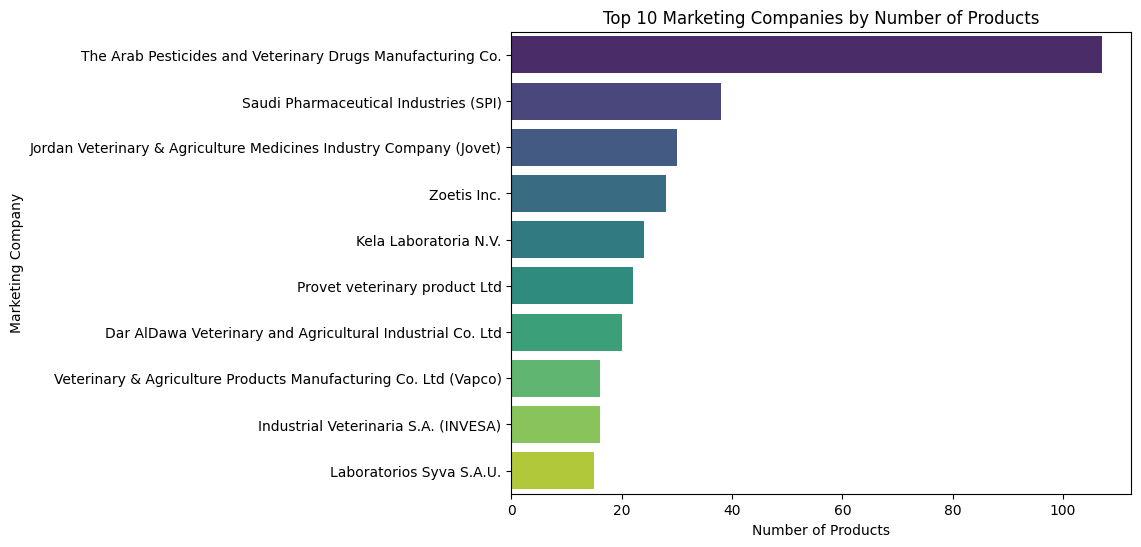

In [ ]:
# Visualization: Top 10 Marketing Companies
plt.figure(figsize=(8, 6))
sns.barplot(y=marketing_company_counts.index, x=marketing_company_counts.values, palette="viridis")
plt.title('Top 10 Marketing Companies by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Marketing Company')
plt.show()

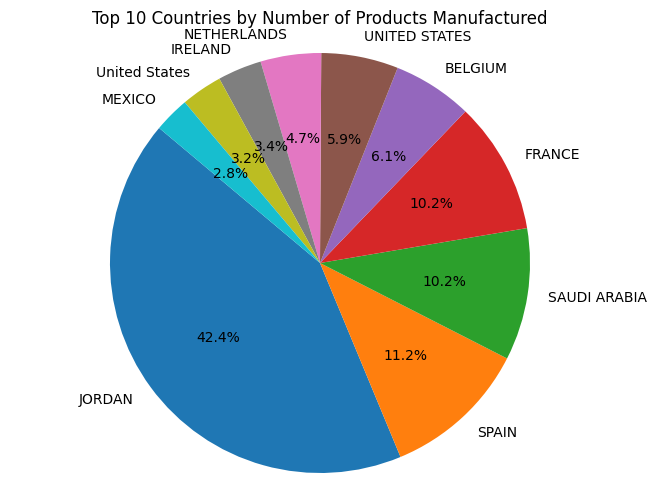

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, )
plt.title('Top 10 Countries by Number of Products Manufactured')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Q3

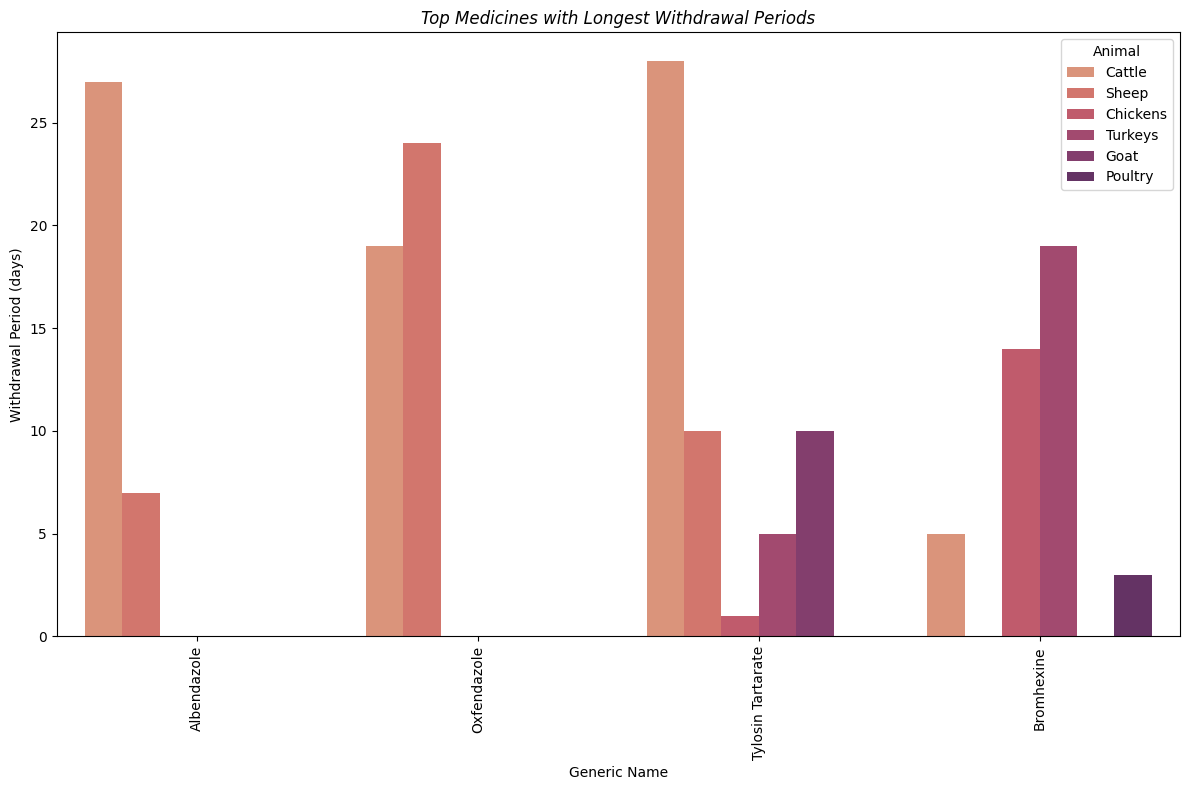

In [ ]:
# Manually entering the data into a DataFrame due to the unclear structure from OCR output
# As the data for Tilmicosin phosphate is not clear, we will exclude it from the visualization

# Prepare the data as a dictionary
data = {
    'Generic Name': ['Albendazole', 'Oxfendazole', 'Tylosin Tartarate', 'Bromhexine'],
    'Cattle': [27, max(19, 3.5), 28, 5],  # Using the maximum value for Oxfendazole as it's unclear
    'Sheep': [7, 24, 10, None],  # No data for Bromhexine for sheep
    'Chickens': [None, None, 1, 14],
    'Turkeys': [None, None, 5, 19],
    'Goat': [None, None, 10, None],  # Assuming the same as sheep for Tylosin Tartarate
    'Poultry': [None, None, None, 3]
}

# Convert dictionary to DataFrame
df_medicines = pd.DataFrame(data)

# We'll melt the DataFrame to have a suitable format for a vertical bar chart (long format)
df_melted = df_medicines.melt(id_vars=['Generic Name'], var_name='Animal', value_name='Withdrawal Period (days)')

# Plot a vertical bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Generic Name', y='Withdrawal Period (days)', hue='Animal', data=df_melted, palette="flare")
plt.title('Top Medicines with Longest Withdrawal Periods', fontstyle='italic')
plt.xlabel('Generic Name')
plt.ylabel('Withdrawal Period (days)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Animal')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()